# Seaborn

Es un modulo de ploteo de graficos estadisticos que esta construida sobre matplotlib.

Lo interesante de este modulo es que, ademas de mostrar graficos estadisticos interesantes con muy poco codigo, es que funciona muy bien con dataframes de pandas.

[repositorio del codigo](https://github.com/mwaskom/seaborn)

[documentacion de seaborn](https://seaborn.pydata.org/)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

In [20]:
%matplotlib inline

#### Datasets

In [ ]:
# seaborn viene con un conjunto de dataframes para cargar y explorar

#['anscombe','attention','brain_networks','car_crashes','dots','exercise','flights',
# 'fmri','gammas','iris','planets','tips','titanic']

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [5]:
df.shape

(244, 7)

## Tipos de datos

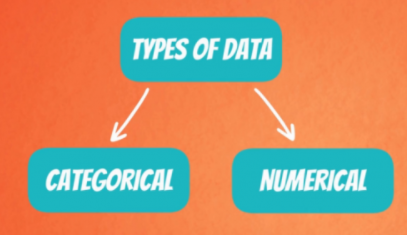

----

## Ploteos de distribucion

Utilizan variables numericas y muestran la distribucion de las mismas

### distplot
Nos muestra la distribucion de una variable numerica a traves de un histograma

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


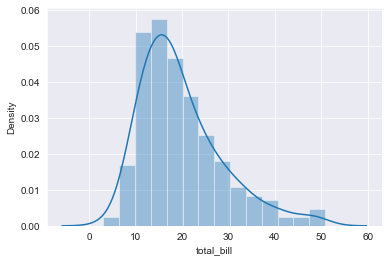

In [10]:
sns.distplot(df['total_bill'])

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


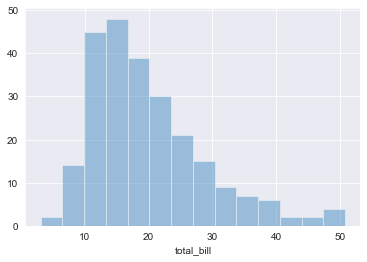

In [11]:
sns.distplot(df['total_bill'],kde=False)

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


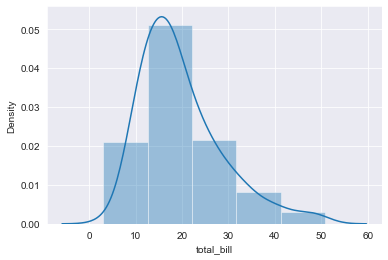

In [13]:
# podemos cambiar la cantidad de bins para mas informacion
sns.distplot(df['total_bill'],bins = 5)

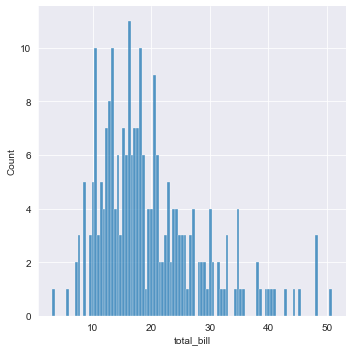

In [15]:
sns.displot(df['total_bill'],bins = 100)

### jointplot
Nos muestra un grafico bivariable (entre dos variables numericas) y ademas un grafico distplot de cada una.

Podemos elegir el tipo de grafico entre ellas:

* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”


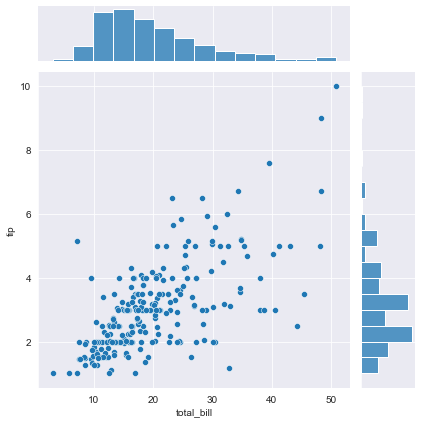

In [16]:
sns.jointplot(x='total_bill',y='tip',data=df)

<Figure size 1224x936 with 0 Axes>

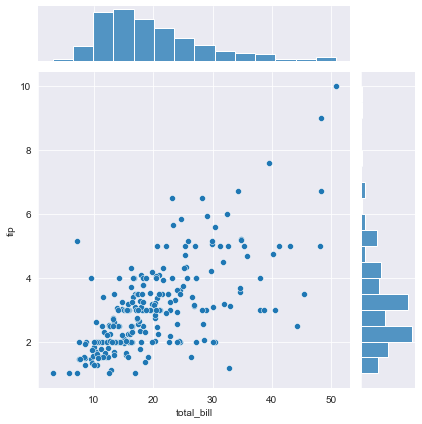

In [21]:
plt.figure(figsize=(17,13))
sns.jointplot(x='total_bill',y='tip',data=df)

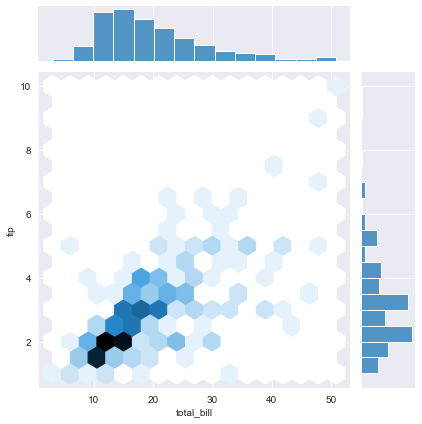

In [22]:
# que pasa si no quiero el scatter plot y quiero otro
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')

### pairplot
Nos permite graficar las relaciones bivariables a traves de todas las variables **numericas** del dataframe y ademas soporta el parametro **hue** para las columnas categoricas.

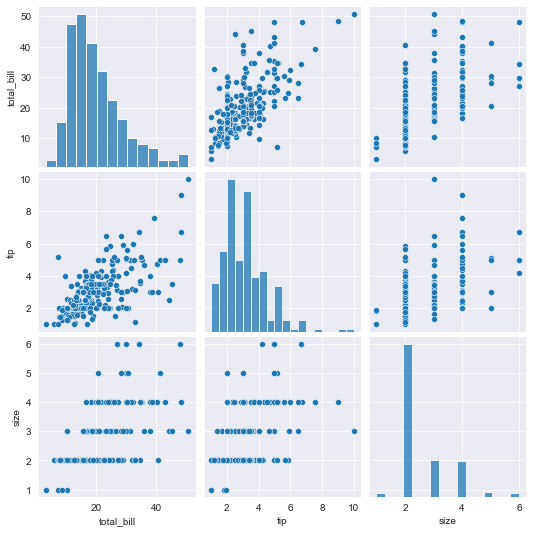

In [24]:
sns.pairplot(df)

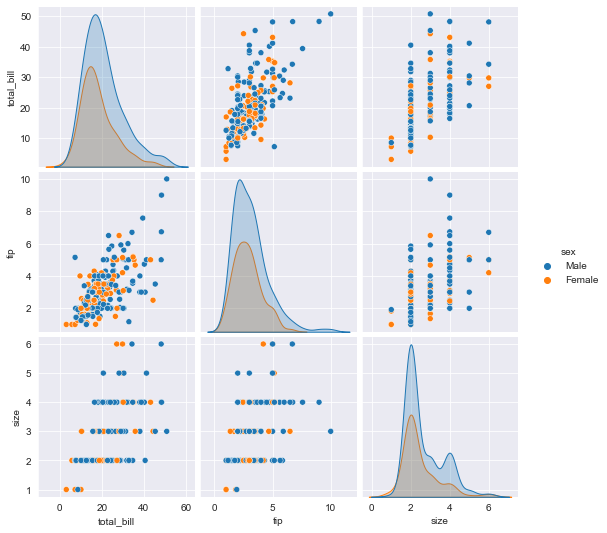

In [25]:
sns.pairplot(df,hue='sex')

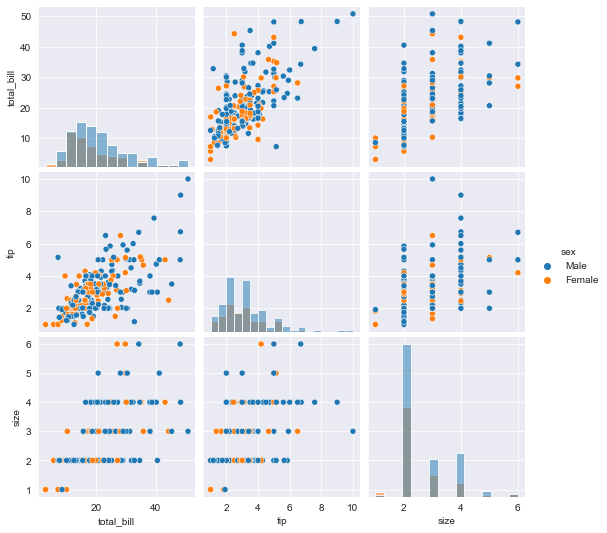

In [26]:
sns.pairplot(df,hue='sex',diag_kind='hist')

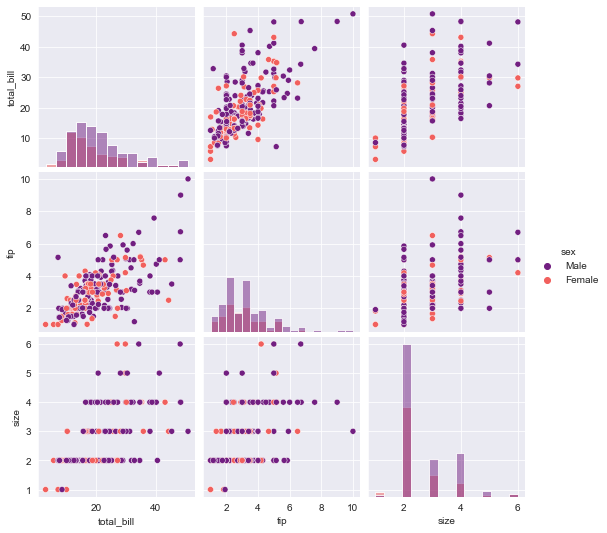

In [27]:
sns.pairplot(df,hue='sex',diag_kind='hist',palette='magma')

**histplot**

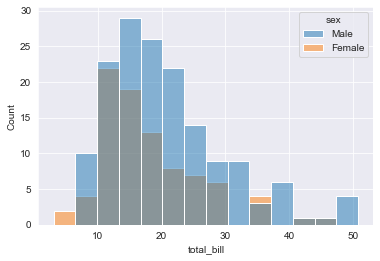

In [33]:
sns.histplot(x='total_bill',data=df,hue='sex')

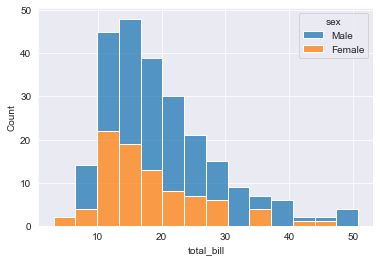

In [34]:
sns.histplot(x='total_bill',data=df,hue='sex',multiple='stack')

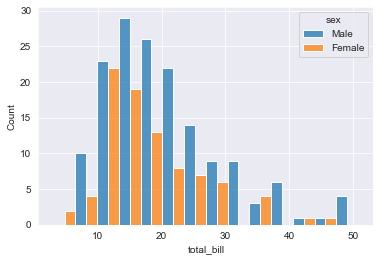

In [31]:
sns.histplot(x='total_bill',data=df,hue='sex',multiple='dodge')

In [ ]:
# y si queremos poner uno al lado del otro?
# ahora lo vemos en grids

----

## Ploteos categoricos

Ploteos para trabajar con variables categoricas

### barplot
Nos permite graficar variables categoricas, usando una funcion de agregacion sobre otra variable (generalmente numerica), por defecto esta funcion de agregacion es la media.

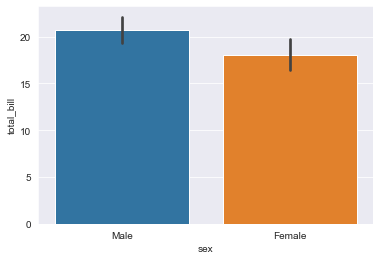

In [36]:
sns.barplot(data=df,x='sex',y='total_bill')

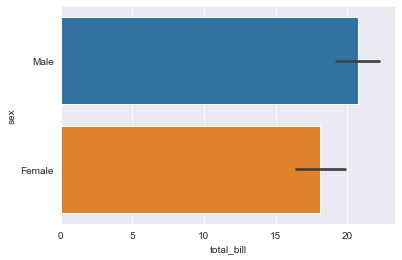

In [37]:
sns.barplot(data=df,y='sex',x='total_bill')

In [39]:
import numpy as np

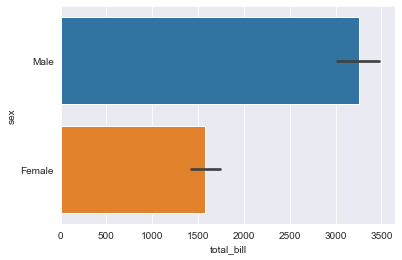

In [40]:
sns.barplot(data=df,y='sex',x='total_bill',estimator = sum)

### countplot
Es basicamente un grafico **barplot** pero que usa como funcion de agregacion la cuenta de la cantidad de datos que tenemos en esa variable.



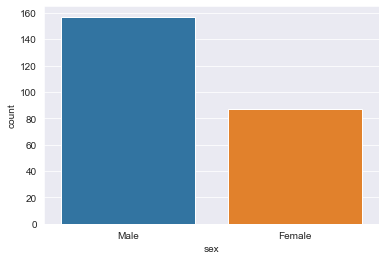

In [41]:
sns.countplot(x='sex',data=df)

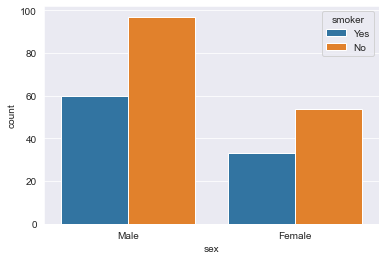

In [42]:
sns.countplot(x='sex',data=df,hue='smoker')

### boxplot

El diagrama de caja es un gráfico utilizado para representar una variable cuantitativa (variable numérica). El gráfico es una herramienta que permite visualizar, a través de los cuartiles, cómo es la distribución, su grado de asimetría, los valores extremos, la posición de la mediana, etc

Podemos extender la definicion para ver la distribucion de las variables categoricas (cualitativas)

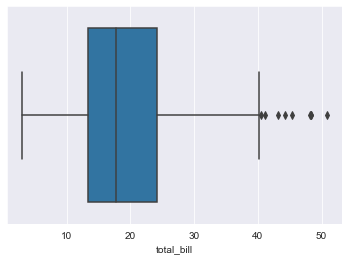

In [43]:
sns.boxplot(x='total_bill',data=df)

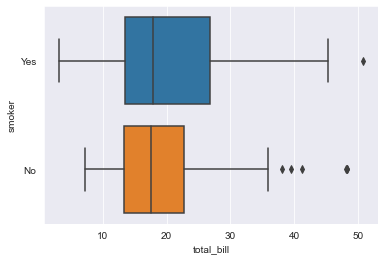

In [45]:
sns.boxplot(x='total_bill',data=df,y='smoker')

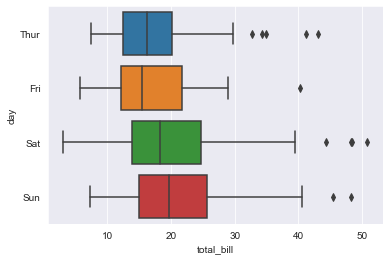

In [46]:
sns.boxplot(x='total_bill',data=df,y='day')

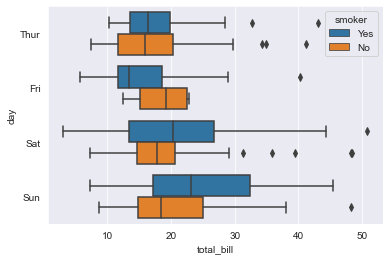

In [47]:
sns.boxplot(x='total_bill',data=df,y='day',hue='smoker')

### stripplot

Este grafico consiste en un scatterplot (grafico de puntos) pero en donde una de las variables es categorica

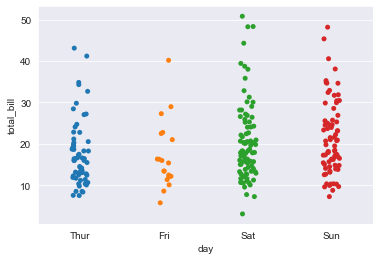

In [48]:
sns.stripplot(x="day", y="total_bill", data=df)

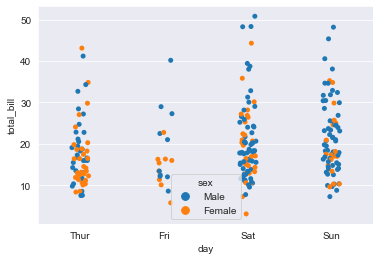

In [49]:
sns.stripplot(x="day", y="total_bill", data=df,hue='sex')

### catplot

Es la forma generalizada de construir un grafico categorico. Hay que pasarle que tipo de grafico queremos en el parametro `kind`.

Veamos unos ejemplos

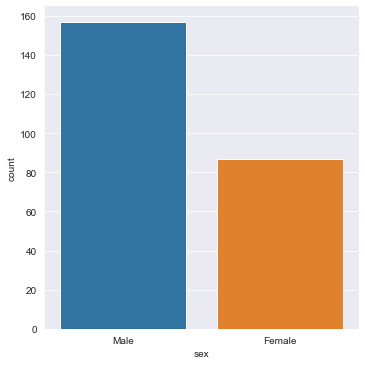

In [50]:
sns.catplot(x='sex',data=df,kind='count')

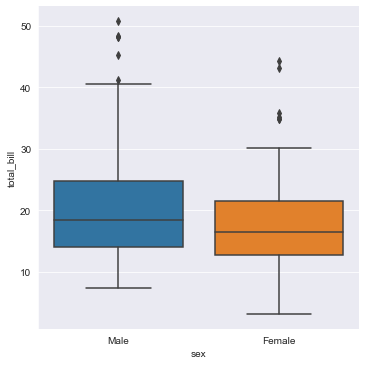

In [51]:
sns.catplot(x='sex',y='total_bill',data=df,kind='box')


----

## Ploteos matriciales

Nos permite hacer graficos matriciales, es decir, mostrar una matriz en un mapa de colores dependiendo de los valores de la misma.

### Heatmap

Para que este grafico funcione correctamente, los datos ya tienen que estar en formato de matriz numerica, y la funcion sns.heatmap() basicamente la colorea.

In [52]:
# creamos una matriz de correlacion
# que nos va a indicar la correlacion entre las distintas variables numericas
df.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

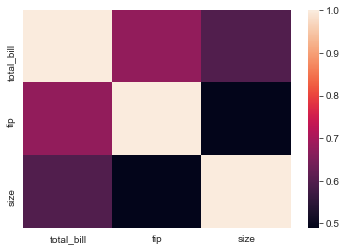

In [53]:
sns.heatmap(df.corr())

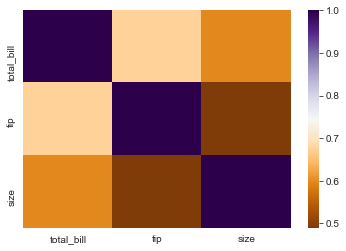

In [54]:
sns.heatmap(df.corr(),cmap='PuOr')

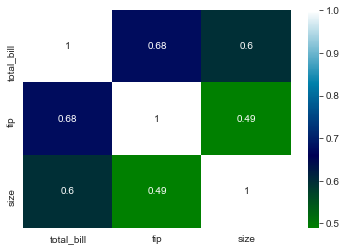

In [55]:
sns.heatmap(df.corr(),cmap='ocean',annot=True)

## Cuadriculas - Grillas

Permiten hacer varios graficos a la vez en distintas grillas

### PairGrid

Crea una grilla para rellenar con graficos bivariables del dataset, para variables numericas.


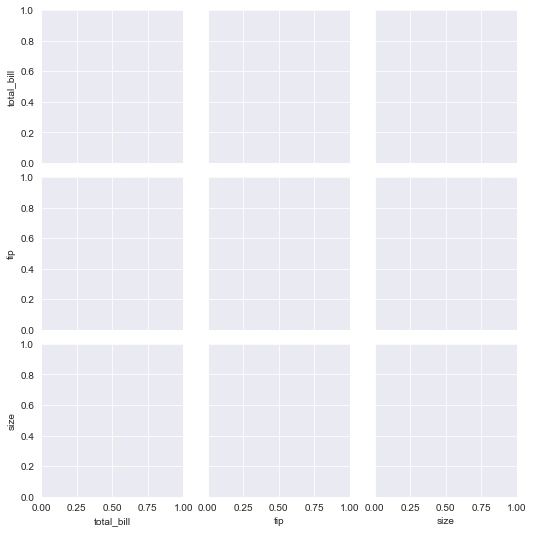

In [56]:
sns.PairGrid(df)

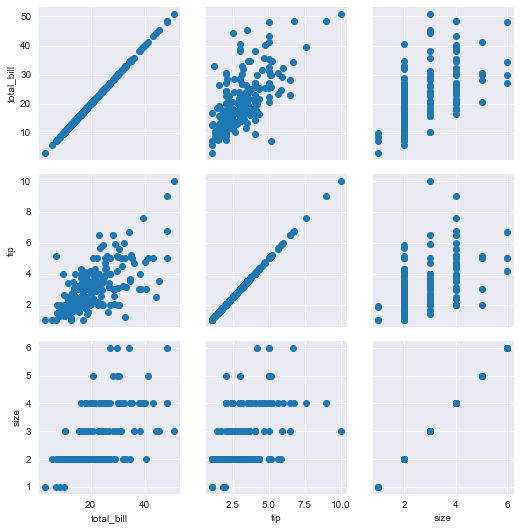

In [57]:
# una vez creada la girlla podemos mapear graficos sobre la misma
g = sns.PairGrid(df)
g.map(plt.scatter)

### Facet Grid

Es una forma general de crear grillas para graficos basados en un campo en particular, con relacion a otros.

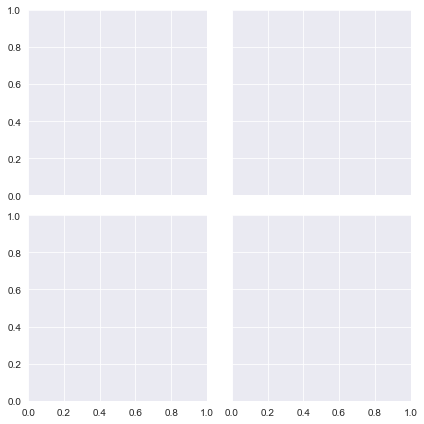

In [58]:
g = sns.FacetGrid(df, col="time", row="smoker")

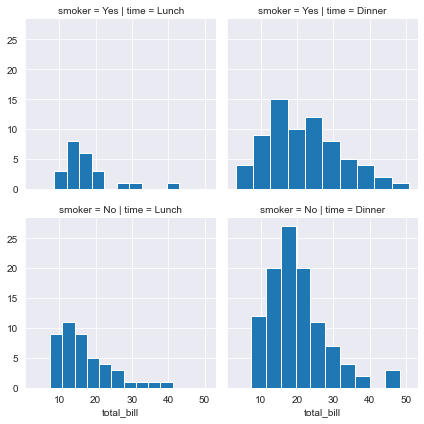

In [59]:
g = sns.FacetGrid(df, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

**volvamos a nuestro ejemplo de histogramas**

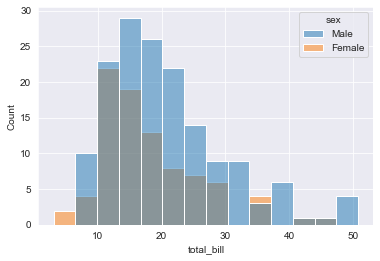

In [60]:
sns.histplot(x='total_bill',data=df,hue='sex')

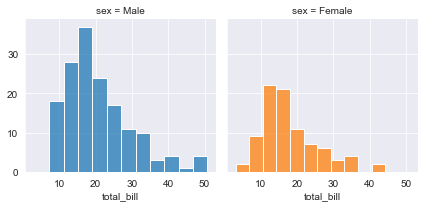

In [61]:
g = sns.FacetGrid(data=df,col="sex",hue='sex')
g.map(sns.histplot,'total_bill')

## Estilos y colores

Veamos un poco mas de seaborn para personalizar nuestros graficos

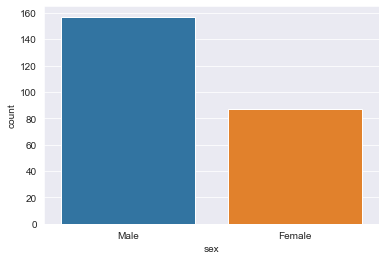

In [62]:
sns.countplot(x='sex',data=df)

In [63]:
# cambiar el estilo de los graficos
# {darkgrid, whitegrid, dark, white, ticks}

sns.set_style('ticks')

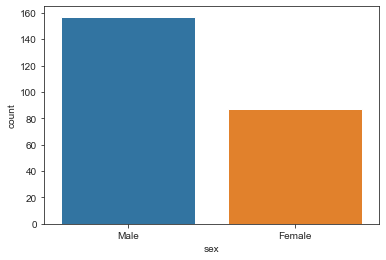

In [64]:
sns.countplot(x='sex',data=df)

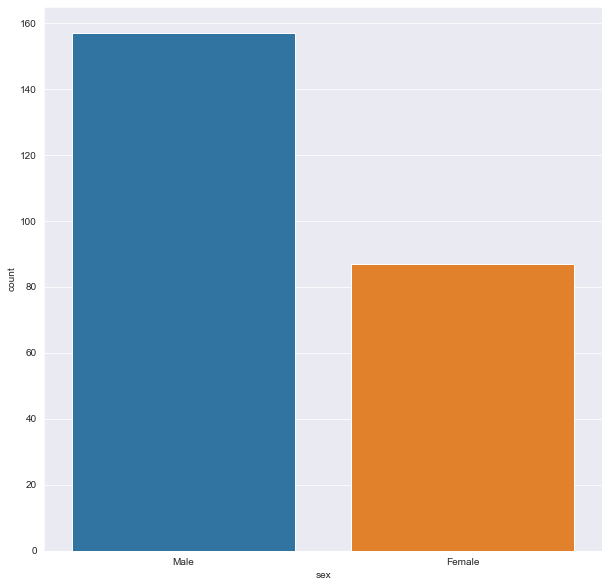

In [66]:
# cambiar el tamano de la imagen
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='sex',data=df)

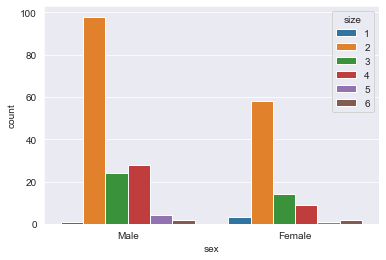

In [67]:
# palettes and colors
sns.countplot(x='sex',data=df,hue="size")

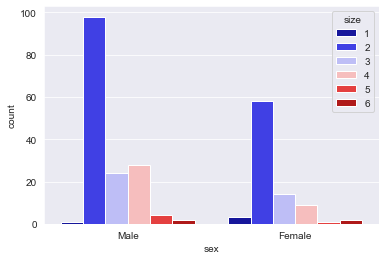

In [68]:
sns.countplot(x='sex',data=df,hue="size",palette='seismic')

https://matplotlib.org/tutorials/colors/colormaps.html